# Assignment 2

### Import Libraries

In [450]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

In [422]:
dataset = pd.read_csv('Modified_Heart_failure_data.csv')
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,NaN,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,NaN,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,NaN,137.0,1.0,0.0,7.0,3
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,NaN,1.1,143.0,1.0,1.0,NaN,294
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,295
296,45.0,0.0,2060.0,1.0,60.0,NaN,742000.00,0.8,138.0,0.0,0.0,278.0,296
297,45.0,NaN,NaN,0.0,38.0,NaN,140000.00,1.4,140.0,1.0,1.0,280.0,297


In [423]:
#head
print("FIRST 5 ROWS OF DATA:\n\n ")
dataset.head()


FIRST 5 ROWS OF DATA::

 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,NaN,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,NaN,7.0,2
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,NaN,137.0,1.0,0.0,7.0,3
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,4


In [424]:
#tail
print("\n\n LAST 5 ROWS OF DATA::\n\n ")
dataset.tail()



 LAST 5 ROWS OF DATA::

 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,patient_id
294,62.0,0.0,61.0,1.0,38.0,1.0,NaN,1.1,143.0,1.0,1.0,NaN,294
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.0,1.2,139.0,0.0,0.0,271.0,295
296,45.0,0.0,2060.0,1.0,60.0,NaN,742000.0,0.8,138.0,0.0,0.0,278.0,296
297,45.0,NaN,NaN,0.0,38.0,NaN,140000.0,1.4,140.0,1.0,1.0,280.0,297
298,50.0,0.0,196.0,0.0,45.0,0.0,395000.0,1.6,136.0,NaN,1.0,285.0,298


In [425]:
#rows and columns of dataset
print('shape of the given dataset:')
dataset.shape

shape of the given dataset:


(299, 13)

In [426]:
#information about the dataset
print("\n\nCOLUMN DATA TYPE:\n")
dataset.info()



COLUMN DATA TYPE:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       270 non-null    float64
 1   anaemia                   270 non-null    float64
 2   creatinine_phosphokinase  270 non-null    float64
 3   diabetes                  270 non-null    float64
 4   ejection_fraction         270 non-null    float64
 5   high_blood_pressure       270 non-null    float64
 6   platelets                 270 non-null    float64
 7   serum_creatinine          270 non-null    float64
 8   serum_sodium              270 non-null    float64
 9   sex                       270 non-null    float64
 10  smoking                   270 non-null    float64
 11  time                      270 non-null    float64
 12  patient_id                299 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 30.5 

In [427]:
#find missing value %
print("missing values in %")
dataset.isnull().sum()/dataset.shape[0]*100

missing values in %


age                         9.698997
anaemia                     9.698997
creatinine_phosphokinase    9.698997
diabetes                    9.698997
ejection_fraction           9.698997
high_blood_pressure         9.698997
platelets                   9.698997
serum_creatinine            9.698997
serum_sodium                9.698997
sex                         9.698997
smoking                     9.698997
time                        9.698997
patient_id                  0.000000
dtype: float64

In [428]:
# Check for duplicates
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [429]:
# Data summary
print("\n\nDATA SUMMARY:\n")
dataset.describe().T



DATA SUMMARY:



,count,mean,std,min,25%,50%,75%,max
age,270.0,60.934570,11.838766,40.0,52.00,60.0,70.0,95.0
anaemia,270.0,0.437037,0.496941,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,270.0,574.266667,958.532760,23.0,119.50,250.0,582.0,7861.0
diabetes,270.0,0.411111,0.492949,0.0,0.00,0.0,1.0,1.0
ejection_fraction,270.0,37.622222,11.715885,14.0,30.00,38.0,45.0,70.0
high_blood_pressure,270.0,0.355556,0.479570,0.0,0.00,0.0,1.0,1.0
platelets,270.0,261522.410185,97633.259068,25100.0,210250.00,261000.0,302000.0,850000.0
serum_creatinine,270.0,1.355519,0.981258,0.5,0.90,1.1,1.4,9.4
serum_sodium,270.0,136.722222,4.226033,113.0,134.00,137.0,139.0,148.0
sex,270.0,0.640741,0.480674,0.0,0.00,1.0,1.0,1.0


# Data preprocessing

In [430]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                         29
anaemia                     29
creatinine_phosphokinase    29
diabetes                    29
ejection_fraction           29
high_blood_pressure         29
platelets                   29
serum_creatinine            29
serum_sodium                29
sex                         29
smoking                     29
time                        29
patient_id                   0
dtype: int64


In [454]:
# Fill missing values for numerical features with the median
numerical_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'platelets','time']
numerical_imputer = SimpleImputer(strategy='median')
dataset[numerical_features] = numerical_imputer.fit_transform(dataset[numerical_features])

# Fill missing values for binary features with the mode
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
# Impute binary features
binary_imputer = SimpleImputer(strategy='most_frequent')
dataset[binary_features] = binary_imputer.fit_transform(dataset[binary_features])



# Verify that there are no missing values left
print("Missing values after imputation:\n", dataset.isnull().sum())

Missing values after imputation:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
patient_id                  0
dtype: int64


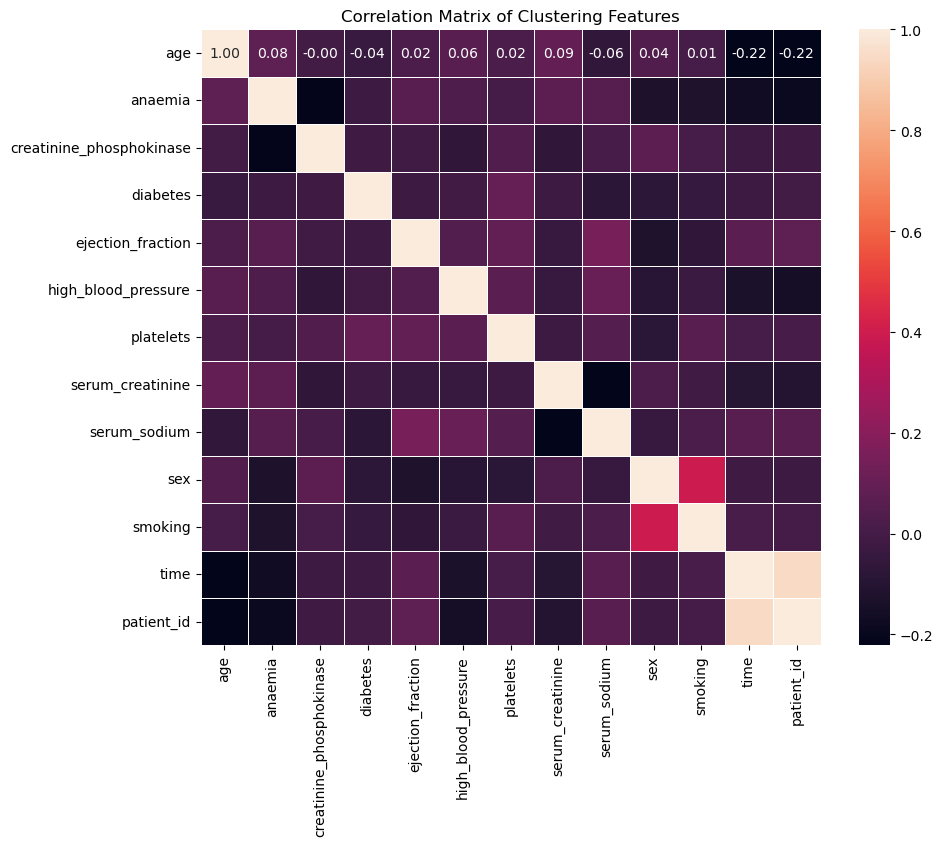

Correlation Matrix:
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.075995                 -0.002796   
anaemia                   0.075995  1.000000                 -0.215071   
creatinine_phosphokinase -0.002796 -0.215071                  1.000000   
diabetes                 -0.037804 -0.025578                 -0.017094   
ejection_fraction         0.023606  0.058034                 -0.014594   
high_blood_pressure       0.059724  0.030978                 -0.065758   
platelets                 0.020585 -0.000191                  0.035522   
serum_creatinine          0.092643  0.070955                 -0.064643   
serum_sodium             -0.063450  0.052222                  0.007981   
sex                       0.035104 -0.127438                  0.073564   
smoking                   0.006460 -0.122657                  0.004699   
time                     -0.221655 -0.166213                 -0.024548   
patient_id        

In [456]:

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Clustering Features')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

In [461]:
# Selecting features for data clustering selected this data's because it is in binary format
Clustering_features = ['age', 'ejection_fraction', 'diabetes','creatinine_phosphokinase', 'platelets','serum_creatinine','serum_sodium',  'high_blood_pressure']
data_clustered = dataset[Clustering_features]
data_clustered.head()

,age,ejection_fraction,diabetes,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,high_blood_pressure
0,75.0,20.0,0.0,582.0,265000.00,1.9,130.0,1.0
1,55.0,38.0,0.0,7861.0,263358.03,1.1,136.0,0.0
2,65.0,20.0,0.0,146.0,162000.00,1.3,129.0,0.0
3,50.0,20.0,0.0,111.0,210000.00,1.1,137.0,0.0
4,65.0,20.0,1.0,160.0,327000.00,2.7,116.0,0.0


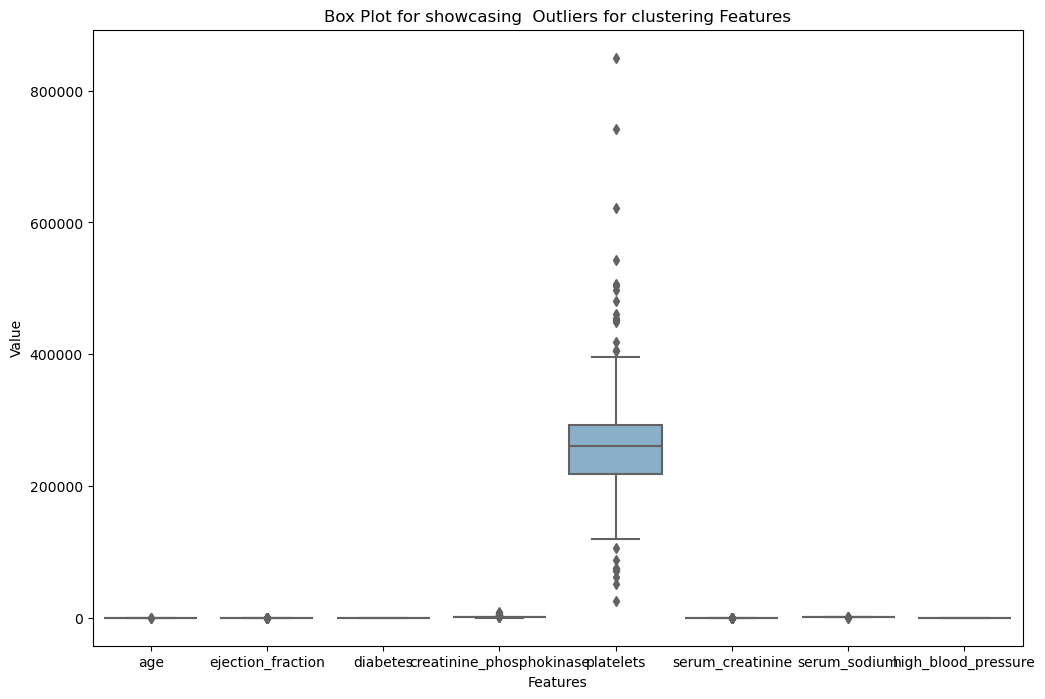

In [485]:
# Plot a boxplot for all numerical features in one plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[Clustering_features], palette="Set3")

# Set plot title and labels
plt.title("Box Plot for showcasing  Outliers for clustering Features")
plt.xlabel("Features")
plt.ylabel("Value")

# Show plot
plt.show()



In [486]:
# Function to remove outliers based on IQR
quartile_value1= dataset[Clustering_features].quantile(0.25)
quartile_value3 = dataset[Clustering_features].quantile(0.75)





In [487]:
Inter_quartile_range=quartile_value3-quartile_value1
higher_bound = quartile_value3 + 1.5 * Inter_quartile_range
smaller_bound= quartile_value1 - 1.5 * Inter_quartile_range

In [488]:
dataset[Clustering_features] > higher_bound
dataset[Clustering_features] < smaller_bound

,age,ejection_fraction,diabetes,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,high_blood_pressure
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False


In [489]:
data_no_outliers = dataset[dataset[Clustering_features] < higher_bound]

In [490]:
import numpy as np
# Capping outliers to the lower and upper bounds
outiler_cappedvalue= dataset.copy()
outiler_cappedvalue[Clustering_features] = np.where(
   outiler_cappedvalue[Clustering_features] < smaller_bound, smaller_bound,
    np.where(outiler_cappedvalue[Clustering_features] > higher_bound, higher_bound, outiler_cappedvalue[Clustering_features])
)

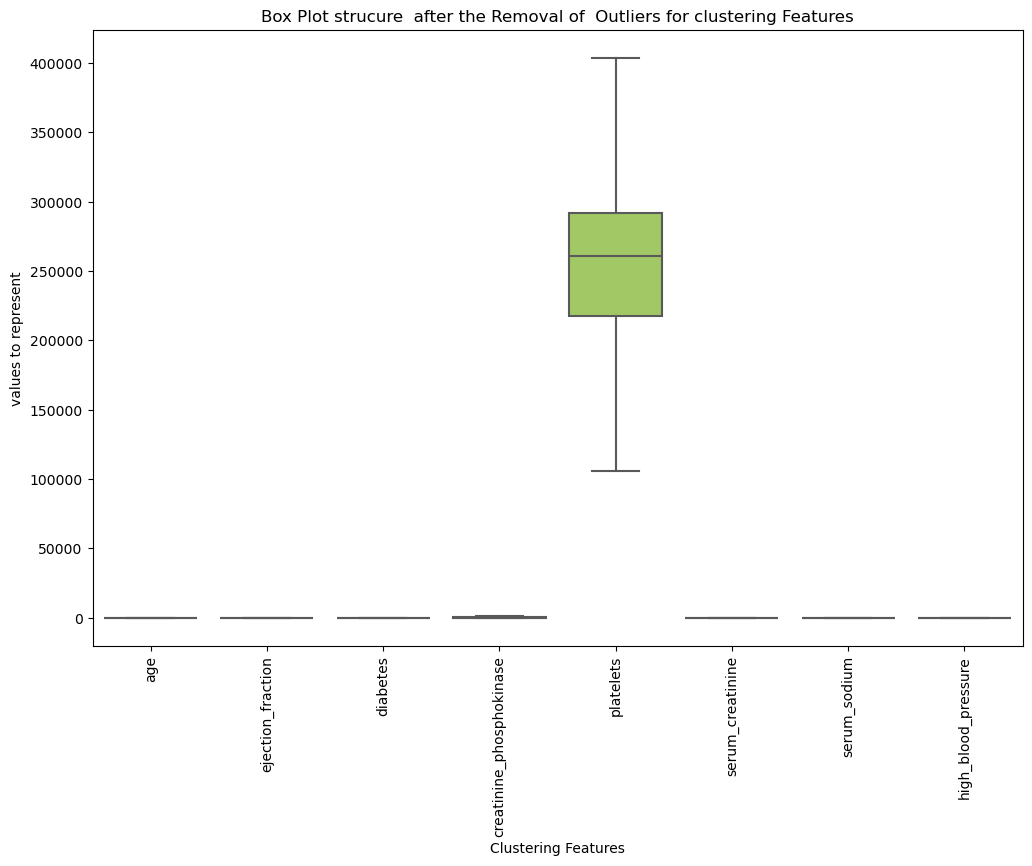

In [491]:
# Plot the box plot for the cleaned data (without outliers)
plt.figure(figsize=(12, 8))
sns.boxplot(data=outiler_cappedvalue[Clustering_features], palette="Set2")

# Set plot title and labels
plt.title("Box Plot strucure  after the Removal of  Outliers for clustering Features")
plt.xlabel("Clustering Features")
plt.ylabel("values to represent")
plt.xticks(rotation=90)
# Show plot
plt.show()

In [512]:
# Standardize the selected clustering features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(outiler_cappedvalue[clustering_features])

C:\Users\udhay\AppData\Local\Temp\ipykernel_15768\636901224.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_analysed_pca[:, 0], data_analysed_pca[:, 1], alpha=0.7, cmap='viridis')


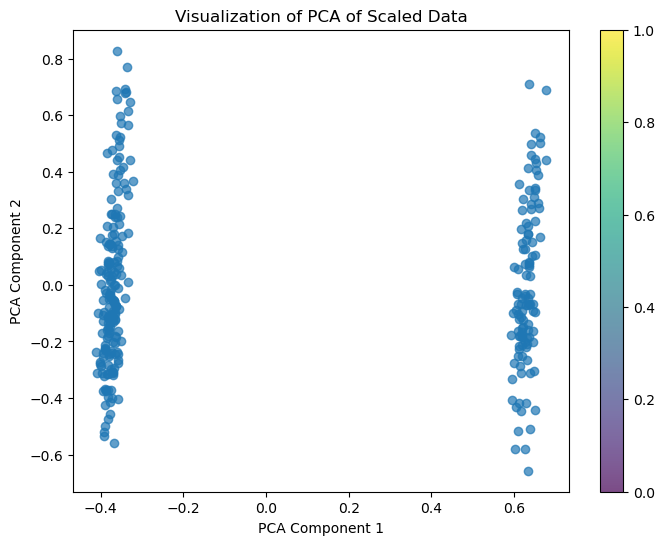

In [496]:
# Reduce dimensions with PCA for visualization
from sklearn.decomposition import PCA
pca_applied = PCA(n_components=2)
data_analysed_pca = pca_applied.fit_transform(data_scaled)
# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(data_analysed_pca[:, 0], data_analysed_pca[:, 1], alpha=0.7, cmap='viridis')
plt.title("Visualization of PCA of Scaled Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# Apply Clustering Algorithm

In [497]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Defining the range of k values to test
K_value = range(2, 10)  #
i_value = []
silhouette_scores_value = []

# Applying K-Means for each value of k and store the inertia and silhouette score
for k in K_value:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_analysed_pca)

    i_value.append(kmeans.inertia_)  # Inertia for elbow method
    silhouette_result = silhouette_score(data_analysed_pca, labels)  # Silhouette score
    silhouette_scores_value.append(silhouette_result)


C:\Users\udhay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\udhay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\udhay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\udhay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

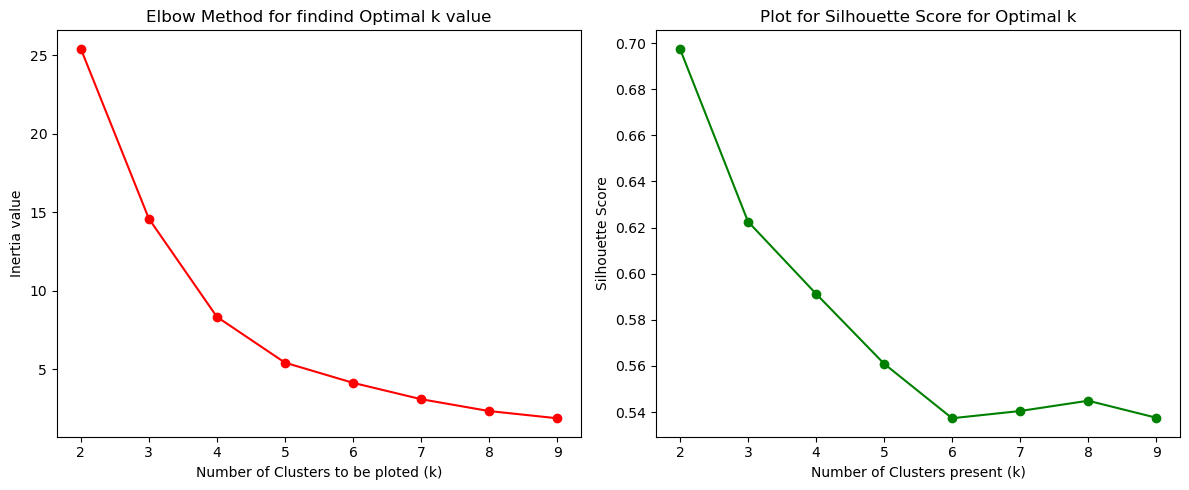

In [498]:
# Plot the Elbow Curve and Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_value, i_value, marker='o', color='red')
plt.xlabel('Number of Clusters to be ploted (k)')
plt.ylabel('Inertia value')
plt.title('Elbow Method for findind Optimal k value')

plt.subplot(1, 2, 2)
plt.plot(K_value, silhouette_scores_value, marker='o', color='green')
plt.xlabel('Number of Clusters present (k)')
plt.ylabel('Silhouette Score')
plt.title('Plot for Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()



In [499]:
# Choosing the optimal k based on elbow and silhouette
optimal_k =3 # This can be adjusted based on the plots

# Apply K-Means with optimal k
kmeans_algorithm = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_algorithm.fit_predict(data_analysed_pca)


C:\Users\udhay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\udhay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


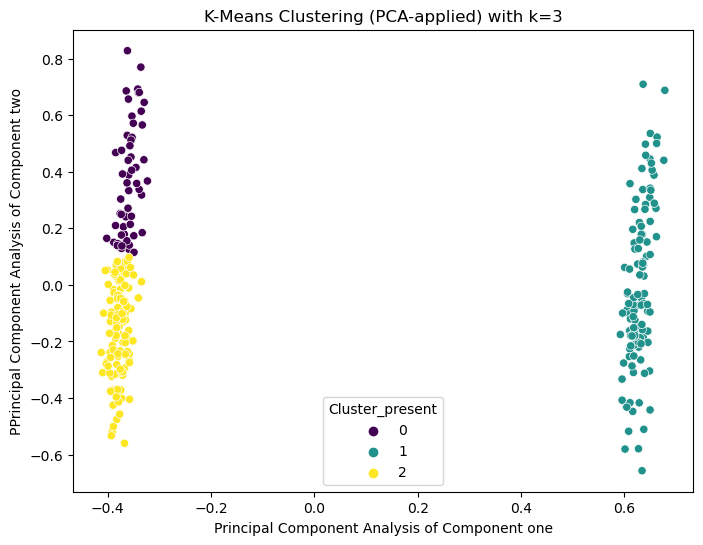

In [500]:
# Plot the clusters with PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_analysed_pca[:, 0], y=data_analysed_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title(f"K-Means Clustering (PCA-applied) with k={optimal_k}")
plt.xlabel("Principal Component Analysis of Component one")
plt.ylabel("PPrincipal Component Analysis of Component two")
plt.legend(title='Cluster_present')
plt.show()


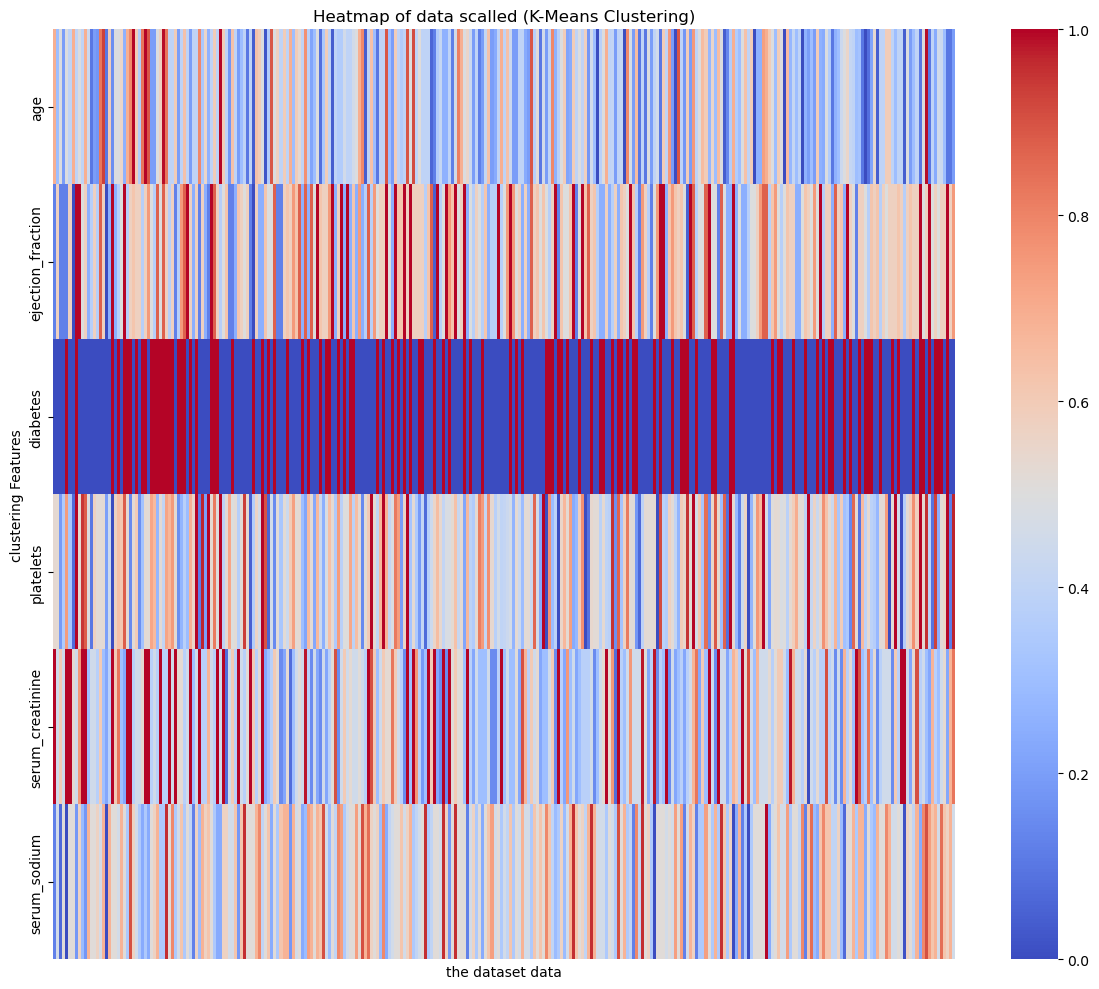

In [501]:
# Create a DataFrame to hold the scaled data and their corresponding cluster labels for ploting
import pandas as pd
data_with_labels = pd.DataFrame(data_scaled, columns=clustering_features)
data_with_labels['Cluster'] = kmeans_labels

# Create a heatmap with rows colored by cluster assignment
plt.figure(figsize=(12, 10))
sns.heatmap(data_with_labels.drop(columns='Cluster').T, cmap="coolwarm", annot=False, cbar=True,
            xticklabels=False, yticklabels=clustering_features)

# Optionally, you can also visualize the correlation matrix between features
plt.title("Heatmap of data scalled (K-Means Clustering)")
plt.xlabel("the dataset data")
plt.ylabel("clustering Features")
plt.tight_layout()
plt.show()

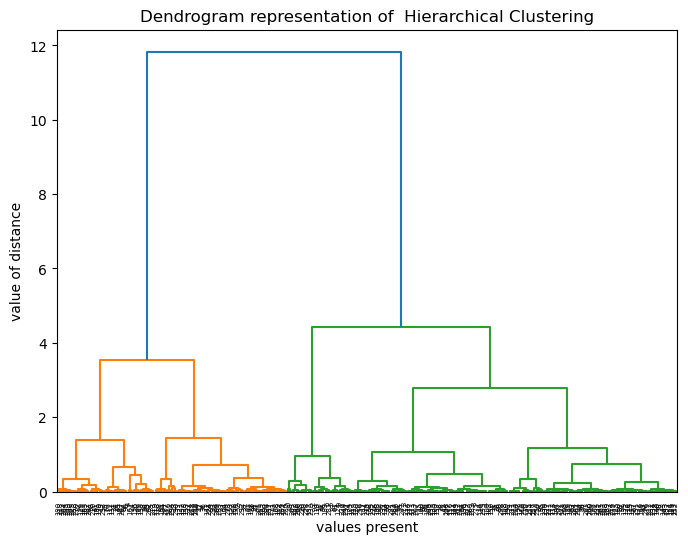

In [503]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering and create a linkage matrix
hierar_clus = linkage(data_analysed_pca, method='ward')  # we can try other methods like 'complete', 'average', etc.

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(8, 6)) #(10,7)
dendrogram(hierar_clus )
plt.title("Dendrogram representation of  Hierarchical Clustering")
plt.xlabel("values present")
plt.xticks(rotation=90)
plt.ylabel("value of distance")
plt.show()


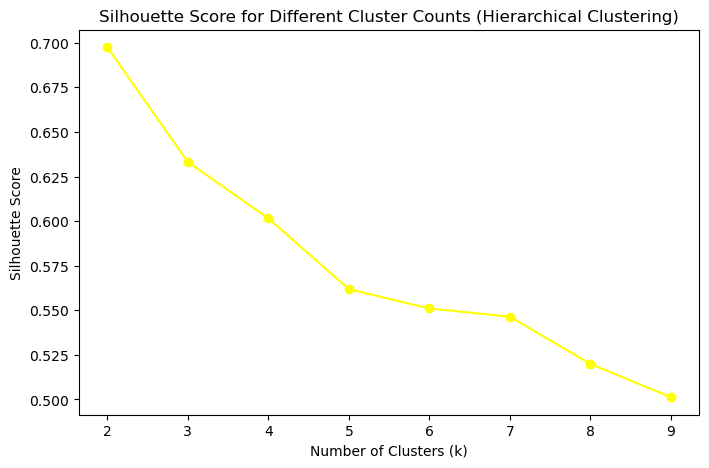

In [504]:
from sklearn.metrics import silhouette_score

# Range of k values to test
K_value = range(2, 10)
silhouette_scores = []

# Calculate silhouette score for different numbers of clusters
for k in K_value:
    # Create cluster labels using fcluster to cut the dendrogram at different levels
    lables = fcluster(hierar_clus, k, criterion='maxclust')
    silhouette = silhouette_score(data_analysed_pca,lables)
    silhouette_scores.append(silhouette)

# Plot Silhouette Scores for different cluster counts
plt.figure(figsize=(8, 5))
plt.plot(K_value, silhouette_scores, marker='o', color='yellow')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts (Hierarchical Clustering)")
plt.show()

In [505]:
# Set optimal k based on dendrogram/silhouette scores
optimal_k = 3  #fetched value from the silhouette score

# Apply hierarchical clustering with the chosen number of clusters
final_hier_value = fcluster(hierar_clus , optimal_k, criterion='maxclust')

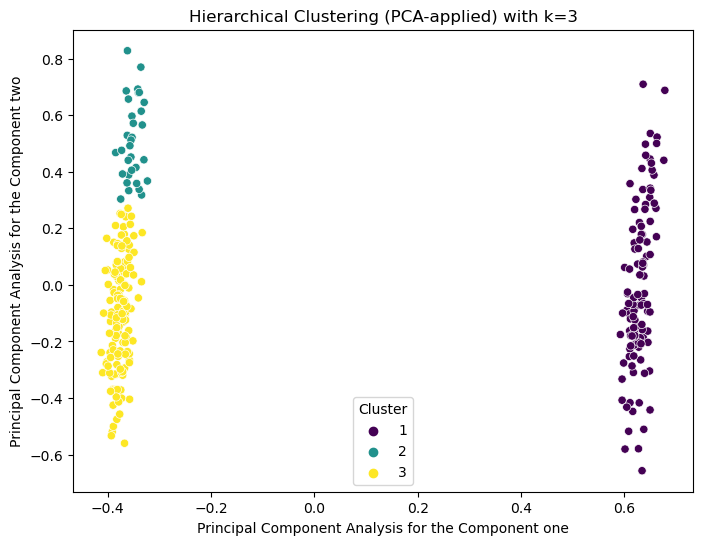

In [506]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters (PCA-reduced) with the optimal k
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_analysed_pca[:, 0], y=data_analysed_pca[:, 1], hue=final_hier_value, palette='viridis', legend='full')
plt.title(f"Hierarchical Clustering (PCA-applied) with k={optimal_k}")
plt.xlabel("Principal Component Analysis for the Component one")
plt.ylabel("Principal Component Analysis for the Component two")
plt.legend(title='Cluster')
plt.show()

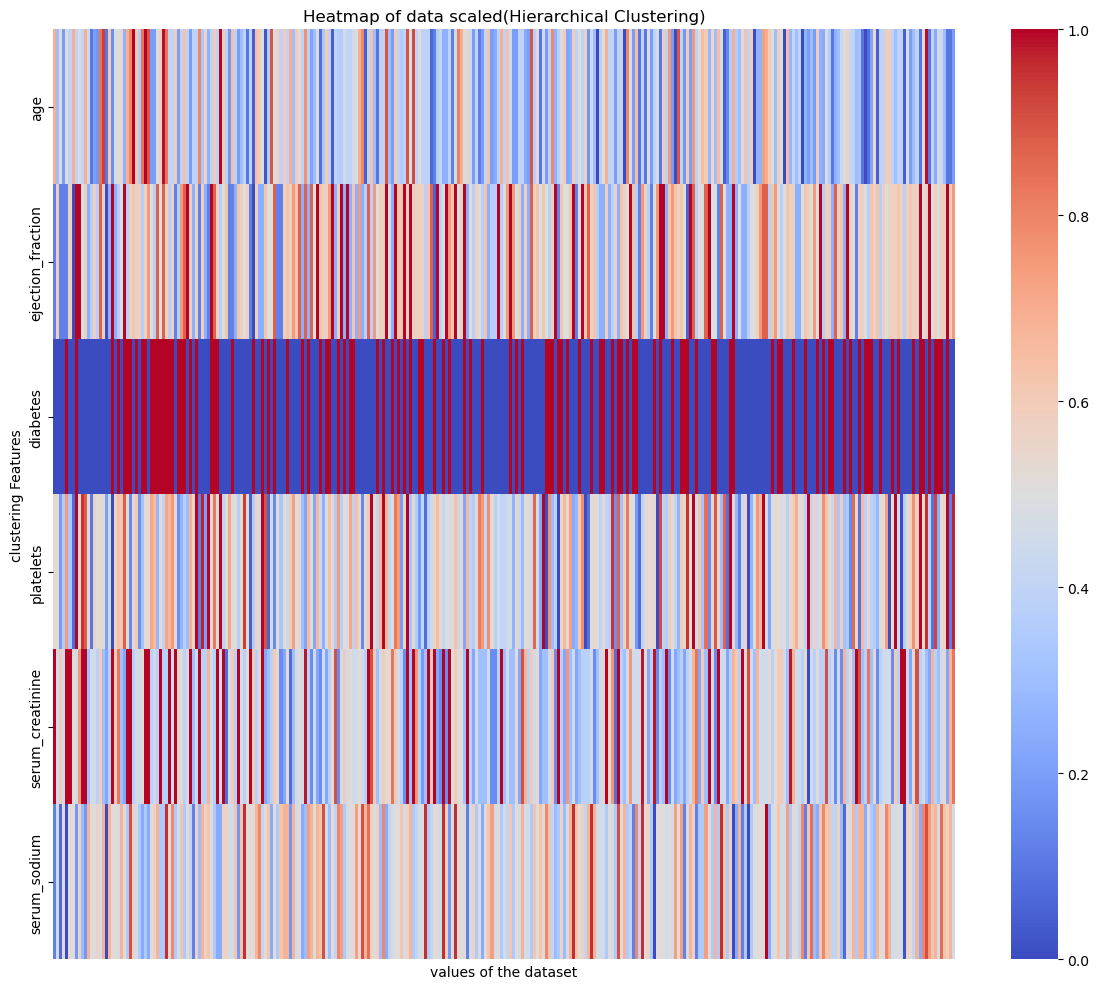

In [507]:
data_with_labels = pd.DataFrame(data_scaled, columns=clustering_features)
data_with_labels['Cluster'] = final_hier_value

# Create a heatmap with rows colored by cluster assignment
plt.figure(figsize=(12, 10))
sns.heatmap(data_with_labels.drop(columns='Cluster').T, cmap="coolwarm", annot=False, cbar=True,
            xticklabels=False, yticklabels=clustering_features)

# Optionally, you can also visualize the correlation matrix between features
plt.title("Heatmap of data scaled(Hierarchical Clustering)")
plt.xlabel("values of the dataset")
plt.ylabel("clustering Features")
plt.tight_layout()
plt.show()

In [508]:
# Evaluate K-Means clusters
kmeans_silhouette = silhouette_score(data_analysed_pca, kmeans_labels)
print(f"Final Silhouette Score of K means clustering: {kmeans_silhouette:.2f}")

# Evaluate Hierarchical Clustering clusters
hierarchical_silhouette = silhouette_score(data_analysed_pca, final_hier_value)
print(f"Final Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.2f}")

Final Silhouette Score of K means clustering: 0.62
Final Silhouette Score for Hierarchical Clustering: 0.63


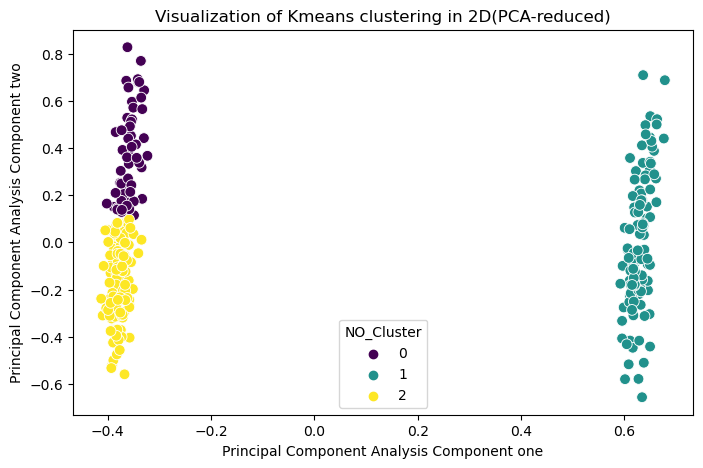

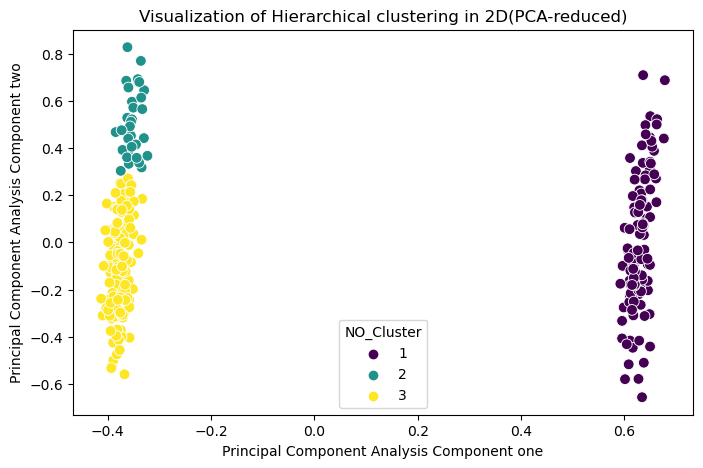

In [509]:
from sklearn.decomposition import PCA

#pca has been already applied for 2d visualization

# Plot the K-Means clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_analysed_pca[:, 0], y=data_analysed_pca[:, 1], hue=kmeans_labels, palette="viridis", s=60)
plt.title("Visualization of Kmeans clustering in 2D(PCA-reduced)")
plt.xlabel("Principal Component Analysis Component one")
plt.ylabel("Principal Component Analysis Component two")
plt.legend(title="NO_Cluster")
plt.show()

# Plot the Hierarchical clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_analysed_pca[:, 0], y=data_analysed_pca[:, 1], hue=final_hier_value, palette="viridis", s=60)
plt.title("Visualization of Hierarchical clustering in 2D(PCA-reduced)")
plt.xlabel("Principal Component Analysis Component one")
plt.ylabel("Principal Component Analysis Component two")
plt.legend(title="NO_Cluster")
plt.show()


In [511]:
print("KMeans Cluster Distribution:")
print(pd.Series(kmeans_labels).value_counts())
print("Hierarchical Cluster Distribution:")
print(pd.Series(final_hier_value).value_counts())

KMeans Cluster Distribution:
2    130
1    111
0     58
Name: count, dtype: int64
Hierarchical Cluster Distribution:
3    156
1    111
2     32
Name: count, dtype: int64
